In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
#Importing our defined functions to clean
from clean_data_functions import *
from scipy.stats import mode

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None) 
sns.set_theme(style ="whitegrid")

%matplotlib inline

In [2]:
eco_bici = pd.read_csv("DATA/year_ecobici_df.csv")

In [3]:
dropna_rows_cols(eco_bici, 6, 1500000)

Deleted 0 rows
Deleted 0 columns


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:55,041,31/01/2024,23:59:41
13735644,M,28.0,2005171,150,31/01/2024,23:56:03,155,31/01/2024,23:59:53
13735645,M,26.0,6842108,545,31/01/2024,23:48:34,115,31/01/2024,23:59:56
13735646,M,53.0,5478714,007,31/01/2024,23:45:28,151,31/01/2024,23:59:58


In [4]:
eco_bici_df= eco_bici.rename(columns={'Genero_Usuario': 'user_gender',
                                       'Edad_Usuario': 'user_age',
                                       'Bici': 'bike_id',
                                       'Ciclo_Estacion_Retiro': 'pickup_station',
                                       'Fecha_Retiro': 'pickup_date',
                                       'Hora_Retiro': 'pickup_time',
                                       'Ciclo_EstacionArribo': 'return_station',
                                       'Fecha Arribo': 'return_date',
                                       'Hora_Arribo': 'return_time'})


In [10]:
eco_bici_df.columns

Index(['Unnamed: 0', 'user_gender', 'user_age', 'bike_id', 'pickup_station',
       'pickup_date', 'pickup_time', 'return_station', 'return_date',
       'return_time'],
      dtype='object')

In [8]:
eco_bici_df["user_gender"] = eco_bici_df["user_gender"].fillna('undefined')

In [10]:
clean_eco_bici_df= eco_bici_df.dropna(subset=['return_station', 'return_date', 'return_time'])
clean_eco_bici_df['user_gender'] = clean_eco_bici_df['user_gender'].replace(['O', '?'], 'undefined')
clean_eco_bici_df["user_gender"] = clean_eco_bici_df["user_gender"].fillna('undefined')

In [11]:
clean_eco_bici_df['user_gender'].unique()

array(['M', 'F', 'undefined'], dtype=object)

In [12]:
clean_eco_bici_df1= clean_eco_bici_df.dropna(subset=['user_age'])
null_check(clean_eco_bici_df1)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735643    0
13735644    0
13735645    0
13735646    0
13735647    0
Length: 13735453, dtype: int64

Total null values per column: 
user_gender       0
user_age          0
bike_id           0
pickup_station    0
pickup_date       0
pickup_time       0
return_station    0
return_date       0
return_time       0
dtype: int64



In [7]:
# #Interesting data in case we want to show the unknown cases where the bikes where not returned, time, age, or finding patterns
# ecobicis_never_returned = eco_bici_df[eco_bici_df['return_station'].isna() | eco_bici_df['return_date'].isna() | eco_bici_df['return_time'].isna()]
# ecobicis_never_returned

In [12]:
clean_eco_bici_df1

### wrangling ecobici df and creating aggregated df

In [13]:
clean_eco_bici_df1['pickup_time'] = clean_eco_bici_df1['pickup_time'].apply(lambda x: '{:02d}:{:02d}:00'.format(*map(int, x.replace('.', ':').split(':'))))
clean_eco_bici_df1['return_time'] = clean_eco_bici_df1['return_time'].apply(lambda x: '{:02d}:{:02d}:00'.format(*map(int, x.replace('.', ':').split(':'))))
clean_eco_bici_df1

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time
0,M,24.0,2252039,007,31/07/2023,23:52:00,064,01/08/2023,00:00:00
1,M,33.0,8626897,206,31/07/2023,23:48:00,212,01/08/2023,00:00:00
2,M,34.0,4940557,215,31/07/2023,23:55:00,212,01/08/2023,00:00:00
3,F,30.0,2036523,291,31/07/2023,23:32:00,082,01/08/2023,00:01:00
4,F,23.0,8079220,546,31/07/2023,23:51:00,498,01/08/2023,00:01:00
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:00,041,31/01/2024,23:59:00
13735644,M,28.0,2005171,150,31/01/2024,23:56:00,155,31/01/2024,23:59:00
13735645,M,26.0,6842108,545,31/01/2024,23:48:00,115,31/01/2024,23:59:00
13735646,M,53.0,5478714,007,31/01/2024,23:45:00,151,31/01/2024,23:59:00


In [14]:
# clean_eco_bici_df1['pickup_time'].apply(lambda x: datetime.strptime(x, "%H:%M:%S"))
# clean_eco_bici_df1['pickup_time'] 
# pd.to_timedelta(clean_eco_bici_df1['pickup_time'])

# clean_eco_bici_df1.isna().sum()

In [15]:
#Convert the time column to datetime format
clean_eco_bici_df1['pickup_time']= pd.to_datetime(clean_eco_bici_df1['pickup_time'], format='%H:%M:%S', errors='coerce').dt.time
clean_eco_bici_df1['return_time']= pd.to_datetime(clean_eco_bici_df1['return_time'], format='%H:%M:%S', errors='coerce').dt.time

clean_eco_bici_df1

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time
0,M,24.0,2252039,007,31/07/2023,23:52:00,064,01/08/2023,00:00:00
1,M,33.0,8626897,206,31/07/2023,23:48:00,212,01/08/2023,00:00:00
2,M,34.0,4940557,215,31/07/2023,23:55:00,212,01/08/2023,00:00:00
3,F,30.0,2036523,291,31/07/2023,23:32:00,082,01/08/2023,00:01:00
4,F,23.0,8079220,546,31/07/2023,23:51:00,498,01/08/2023,00:01:00
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:00,041,31/01/2024,23:59:00
13735644,M,28.0,2005171,150,31/01/2024,23:56:00,155,31/01/2024,23:59:00
13735645,M,26.0,6842108,545,31/01/2024,23:48:00,115,31/01/2024,23:59:00
13735646,M,53.0,5478714,007,31/01/2024,23:45:00,151,31/01/2024,23:59:00


In [16]:
clean_eco_bici_df= clean_eco_bici_df1.dropna(subset=['pickup_time','return_time'])

In [17]:
clean_eco_bici_df['pickup_date'] = pd.to_datetime(clean_eco_bici_df['pickup_date'], format='%d/%m/%Y', errors='coerce')
#clean_eco_bici_df['pickup_time'] = pd.to_datetime(clean_eco_bici_df['pickup_time'], format='%H:%M:%S', errors='coerce').dt.time
clean_eco_bici_df['return_date'] = pd.to_datetime(clean_eco_bici_df['return_date'], format='%d/%m/%Y', errors='coerce')
#clean_eco_bici_df['return_time'] = pd.to_datetime(clean_eco_bici_df['return_time'], format='%H:%M:%S', errors='coerce').dt.time
null_check(clean_eco_bici_df)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735643    0
13735644    0
13735645    0
13735646    0
13735647    0
Length: 13735453, dtype: int64

Total null values per column: 
user_gender       0
user_age          0
bike_id           0
pickup_station    0
pickup_date       0
pickup_time       0
return_station    0
return_date       0
return_time       0
dtype: int64



In [18]:
clean_eco_bici_df= clean_eco_bici_df.dropna(subset=['pickup_date','return_date'])

In [19]:
clean_eco_bici_df['pickup_station'] = pd.to_numeric(clean_eco_bici_df['pickup_station'], errors='coerce', downcast='integer')
clean_eco_bici_df['return_station'] = pd.to_numeric(clean_eco_bici_df['pickup_station'], errors='coerce')

In [20]:
# Concatenate 'pickup_date' and 'pickup_time' to create a new combined datetime column
clean_eco_bici_df['pickup_datetime'] = pd.to_datetime(clean_eco_bici_df['pickup_date'] + pd.to_timedelta(clean_eco_bici_df['pickup_time'].astype(str)))
# Map the combined datetime to a new hourly datetime column
clean_eco_bici_df['hourly_aggregated'] = clean_eco_bici_df['pickup_datetime'].dt.floor('H')
# Calculate duration of the rental
clean_eco_bici_df['return_datetime'] = pd.to_datetime(clean_eco_bici_df['return_date'] + pd.to_timedelta(clean_eco_bici_df['return_time'].astype(str)))
clean_eco_bici_df['duration'] = clean_eco_bici_df['return_datetime'] - clean_eco_bici_df['pickup_datetime']

In [21]:
stations_df = pd.DataFrame(clean_eco_bici_df.pickup_station.value_counts()).reset_index()
stations_df.tail(10)
# station 271, 1, 27, 182 and 64 have highest pickup counts
# what's up with the last 6 pick up stations?

,pickup_station,count
634,606.0,336
635,693.0,333
636,523.0,330
637,4422222.0,323
638,581.0,317
639,574.0,303
640,522.0,299
641,1000.0,150
642,526.0,149
643,528.0,18


<b> Adding a feature indicating whether the day of rental was a business day or not</b>

In [22]:
# Map the hourly_aggregated to a new column indicating business day [1] or weekend/holiday [0]

# Public holidays in Mexico City:

public_holidays = [ # month and day
    '01-01', # new year's day
    '02-05', # consistution day
    '03-21', # Benito Juárez's Birthday
    '05-01', # Labour day
    '09-16', # Independence day
    '12-25', # Christmas
]

# convert public_holidays to datetime format
public_holidays_dt = [datetime.strptime(holiday, '%m-%d') for holiday in public_holidays]

# use apply function to check whether datetime in 'hourly_aggregated' is a public holiday or weekend
clean_eco_bici_df['is_business_day'] = clean_eco_bici_df['hourly_aggregated'].apply(
    lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
)

clean_eco_bici_df

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,24.0,2252039,7.0,2023-07-31,23:52:00,7.0,2023-08-01,00:00:00,2023-07-31 23:52:00,2023-07-31 23:00:00,2023-08-01 00:00:00,0 days 00:08:00,1
1,M,33.0,8626897,206.0,2023-07-31,23:48:00,206.0,2023-08-01,00:00:00,2023-07-31 23:48:00,2023-07-31 23:00:00,2023-08-01 00:00:00,0 days 00:12:00,1
2,M,34.0,4940557,215.0,2023-07-31,23:55:00,215.0,2023-08-01,00:00:00,2023-07-31 23:55:00,2023-07-31 23:00:00,2023-08-01 00:00:00,0 days 00:05:00,1
3,F,30.0,2036523,291.0,2023-07-31,23:32:00,291.0,2023-08-01,00:01:00,2023-07-31 23:32:00,2023-07-31 23:00:00,2023-08-01 00:01:00,0 days 00:29:00,1
4,F,23.0,8079220,546.0,2023-07-31,23:51:00,546.0,2023-08-01,00:01:00,2023-07-31 23:51:00,2023-07-31 23:00:00,2023-08-01 00:01:00,0 days 00:10:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,22.0,2024-01-31,23:47:00,22.0,2024-01-31,23:59:00,2024-01-31 23:47:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:12:00,1
13735644,M,28.0,2005171,150.0,2024-01-31,23:56:00,150.0,2024-01-31,23:59:00,2024-01-31 23:56:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:03:00,1
13735645,M,26.0,6842108,545.0,2024-01-31,23:48:00,545.0,2024-01-31,23:59:00,2024-01-31 23:48:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:11:00,1
13735646,M,53.0,5478714,7.0,2024-01-31,23:45:00,7.0,2024-01-31,23:59:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:14:00,1


In [23]:
clean_eco_bici_df= clean_eco_bici_df.sort_values(by='pickup_datetime')
clean_eco_bici_df.reset_index(drop=True, inplace=True)

In [24]:
clean_eco_bici_df= clean_eco_bici_df.dropna(subset=['pickup_station','return_station'])

In [25]:
# Define columns to convert to integers
columns_to_convert = ['user_age', 'pickup_station', 'return_station']

# Convert specified columns to integers
clean_eco_bici_df[columns_to_convert] = clean_eco_bici_df[columns_to_convert].astype(int)

In [175]:
# export to csv for Tableau
clean_eco_bici_df.to_csv('clean_eco_bici_df.csv')

In [188]:
clean_eco_bici_df.tail(50)

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
13735403,M,19,7410467,419,2024-01-31,23:44:00,419,2024-01-31,23:54:00,2024-01-31 23:44:00,2024-01-31 23:00:00,2024-01-31 23:54:00,0 days 00:10:00,1
13735404,M,43,6668115,145,2024-01-31,23:44:00,145,2024-01-31,23:49:00,2024-01-31 23:44:00,2024-01-31 23:00:00,2024-01-31 23:49:00,0 days 00:05:00,1
13735405,F,19,3223575,270,2024-01-31,23:44:00,270,2024-01-31,23:53:00,2024-01-31 23:44:00,2024-01-31 23:00:00,2024-01-31 23:53:00,0 days 00:09:00,1
13735406,M,32,2142115,258,2024-01-31,23:44:00,258,2024-01-31,23:54:00,2024-01-31 23:44:00,2024-01-31 23:00:00,2024-01-31 23:54:00,0 days 00:10:00,1
13735407,M,38,3184918,416,2024-01-31,23:45:00,416,2024-01-31,23:47:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:47:00,0 days 00:02:00,1
13735408,M,32,6700058,9,2024-01-31,23:45:00,9,2024-01-31,23:47:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:47:00,0 days 00:02:00,1
13735409,M,53,5478714,7,2024-01-31,23:45:00,7,2024-01-31,23:59:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:14:00,1
13735410,M,26,8438061,619,2024-01-31,23:45:00,619,2024-01-31,23:47:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:47:00,0 days 00:02:00,1
13735411,M,31,2288678,18,2024-01-31,23:45:00,18,2024-01-31,23:59:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:14:00,1
13735412,M,26,3966611,47,2024-01-31,23:45:00,47,2024-01-31,23:52:00,2024-01-31 23:45:00,2024-01-31 23:00:00,2024-01-31 23:52:00,0 days 00:07:00,1


<b>Split dataset into individual dataframes per bike station</b>

In [28]:
# instantiate a list of the individual pickup stations 
pickup_stations = clean_eco_bici_df.pickup_station.unique()
pickup_stations

array([     81,      56,      22,     287,     302,      19,     116,
           131,     254,     111,      16,     157,     228,     330,
           220,     249,       2,      79,      46,     320,      74,
            65,      43,      25,      57,     214,       3,     212,
           343,     132,     105,      99,      30,     260,     137,
           150,     175,     285,     454,      35,     261,      89,
            33,      31,     255,      76,      63,     281,     384,
           124,     115,      10,     472,     461,     152,     345,
            41,     181,     123,     439,     393,     133,     270,
           114,     354,     327,     263,     128,      64,     119,
           102,     284,      72,     466,     318,     322,     428,
           147,     378,     476,     180,     555,      70,     427,
           134,      93,     467,     415,      40,     372,     196,
           161,      66,     312,     122,      83,       6,       7,
           293,     

In [29]:
# saving each individual dataframe into a dictionary, where station number is key and df is value
# access each df later by calling the station number as value in the dict, e.g. stations_dict['station_number']

stations_dict = {}

for station in pickup_stations: 
    stations_dict[station] = clean_eco_bici_df[(clean_eco_bici_df['pickup_station']==station)]
    print(f"Dataframe for station {station} was created.")
print(f"Number of new dataframes: {len(stations_dict)}")

Dataframe for station 81 was created.
Dataframe for station 56 was created.
Dataframe for station 22 was created.
Dataframe for station 287 was created.
Dataframe for station 302 was created.
Dataframe for station 19 was created.
Dataframe for station 116 was created.
Dataframe for station 131 was created.
Dataframe for station 254 was created.
Dataframe for station 111 was created.
Dataframe for station 16 was created.
Dataframe for station 157 was created.
Dataframe for station 228 was created.
Dataframe for station 330 was created.
Dataframe for station 220 was created.
Dataframe for station 249 was created.
Dataframe for station 2 was created.
Dataframe for station 79 was created.
Dataframe for station 46 was created.
Dataframe for station 320 was created.
Dataframe for station 74 was created.
Dataframe for station 65 was created.
Dataframe for station 43 was created.
Dataframe for station 25 was created.
Dataframe for station 57 was created.
Dataframe for station 214 was created.


Dataframe for station 377 was created.
Dataframe for station 413 was created.
Dataframe for station 55 was created.
Dataframe for station 362 was created.
Dataframe for station 394 was created.
Dataframe for station 456 was created.
Dataframe for station 177 was created.
Dataframe for station 48 was created.
Dataframe for station 247 was created.
Dataframe for station 231 was created.
Dataframe for station 333 was created.
Dataframe for station 423 was created.
Dataframe for station 460 was created.
Dataframe for station 468 was created.
Dataframe for station 443 was created.
Dataframe for station 459 was created.
Dataframe for station 457 was created.
Dataframe for station 324 was created.
Dataframe for station 438 was created.
Dataframe for station 104 was created.
Dataframe for station 294 was created.
Dataframe for station 80 was created.
Dataframe for station 94 was created.
Dataframe for station 135 was created.
Dataframe for station 136 was created.
Dataframe for station 75 was 

Dataframe for station 462 was created.
Dataframe for station 441 was created.
Dataframe for station 477 was created.
Dataframe for station 392 was created.
Dataframe for station 546 was created.
Dataframe for station 453 was created.
Dataframe for station 4 was created.
Dataframe for station 357 was created.
Dataframe for station 473 was created.
Dataframe for station 149 was created.
Dataframe for station 146 was created.
Dataframe for station 69 was created.
Dataframe for station 245 was created.
Dataframe for station 537 was created.
Dataframe for station 481 was created.
Dataframe for station 425 was created.
Dataframe for station 492 was created.
Dataframe for station 496 was created.
Dataframe for station 495 was created.
Dataframe for station 504 was created.
Dataframe for station 498 was created.
Dataframe for station 502 was created.
Dataframe for station 536 was created.
Dataframe for station 497 was created.
Dataframe for station 507 was created.
Dataframe for station 506 wa

In [30]:
# calling dataframe for pickup_station 6
stations_dict[6]

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
192,undefined,37,5125273,6,2023-01-01,07:20:00,6,2023-01-01,07:26:00,2023-01-01 07:20:00,2023-01-01 07:00:00,2023-01-01 07:26:00,0 days 00:06:00,0
270,M,42,7262884,6,2023-01-01,08:27:00,6,2023-01-01,08:33:00,2023-01-01 08:27:00,2023-01-01 08:00:00,2023-01-01 08:33:00,0 days 00:06:00,0
535,M,58,5202841,6,2023-01-01,10:15:00,6,2023-01-01,10:51:00,2023-01-01 10:15:00,2023-01-01 10:00:00,2023-01-01 10:51:00,0 days 00:36:00,0
621,M,36,4868600,6,2023-01-01,10:38:00,6,2023-01-01,10:43:00,2023-01-01 10:38:00,2023-01-01 10:00:00,2023-01-01 10:43:00,0 days 00:05:00,0
702,M,35,8541591,6,2023-01-01,10:58:00,6,2023-01-01,11:06:00,2023-01-01 10:58:00,2023-01-01 10:00:00,2023-01-01 11:06:00,0 days 00:08:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13734080,F,33,3026184,6,2024-01-31,22:30:00,6,2024-01-31,22:48:00,2024-01-31 22:30:00,2024-01-31 22:00:00,2024-01-31 22:48:00,0 days 00:18:00,1
13734102,M,41,5299292,6,2024-01-31,22:31:00,6,2024-01-31,23:15:00,2024-01-31 22:31:00,2024-01-31 22:00:00,2024-01-31 23:15:00,0 days 00:44:00,1
13734394,M,33,8081168,6,2024-01-31,22:43:00,6,2024-01-31,23:18:00,2024-01-31 22:43:00,2024-01-31 22:00:00,2024-01-31 23:18:00,0 days 00:35:00,1
13734547,M,32,4277828,6,2024-01-31,22:51:00,6,2024-01-31,23:00:00,2024-01-31 22:51:00,2024-01-31 22:00:00,2024-01-31 23:00:00,0 days 00:09:00,1


<b> Aggregating each station's df by hour</b>

In [132]:
# For each dataframe in stations_dict:
# Group by 'hourly_datetime' and aggregate the data using aggregating functions (mean, mode, etc.)
# set index to hour and reindex to get full index and insert empty rows for missing hours, fillna with 0
# saving each individual dataframe into a dictionary, where station number is key and df is value

full_index = pd.date_range(start='2023-01-01 00:00:00', end='2024-02-01 00:00:00', freq='H')
stations_hourly_dict = {}

for key,value in stations_dict.items():
    station_aggregated = value.groupby('hourly_aggregated',as_index=False).agg(
        {'bike_id': 'count',
         'duration': 'mean',
        }
    )
    # reformat df columns and duration values, reset index
    station_aggregated.rename(columns={'hourly_aggregated':'hour','bike_id':'rental_counts','duration':'avg_rental_duration'},inplace=True)
    station_aggregated.set_index('hour', drop=False, inplace=True)
    station_aggregated = station_aggregated.reindex(full_index)
    station_aggregated.hour = station_aggregated.index
    station_aggregated.fillna(0, inplace=True)
    
    # convert avg rental duration from timedelta to float, representing minutes
    station_aggregated['avg_rental_duration'] = station_aggregated['avg_rental_duration'].apply(
    lambda x: round(float(x.total_seconds() / 60) if isinstance(x, pd.Timedelta) else x, 2))
    
    # add is_business_day
    station_aggregated['is_business_day'] = pd.to_datetime(station_aggregated['hour']).apply(
        lambda x: 1 if 
        (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] \
        and x.weekday() < 5 else 0
    )
    station_aggregated.drop('hour', axis=1,inplace=True)
    
    stations_hourly_dict[key] = station_aggregated

    print(f"Aggregated dataframe for station {key} was created.")
    
print(f"Number of new dataframes: {len(stations_hourly_dict)}")

Aggregated dataframe for station 81 was created.
Aggregated dataframe for station 56 was created.
Aggregated dataframe for station 22 was created.
Aggregated dataframe for station 287 was created.
Aggregated dataframe for station 302 was created.
Aggregated dataframe for station 19 was created.
Aggregated dataframe for station 116 was created.
Aggregated dataframe for station 131 was created.
Aggregated dataframe for station 254 was created.
Aggregated dataframe for station 111 was created.
Aggregated dataframe for station 16 was created.
Aggregated dataframe for station 157 was created.
Aggregated dataframe for station 228 was created.
Aggregated dataframe for station 330 was created.
Aggregated dataframe for station 220 was created.
Aggregated dataframe for station 249 was created.
Aggregated dataframe for station 2 was created.
Aggregated dataframe for station 79 was created.
Aggregated dataframe for station 46 was created.
Aggregated dataframe for station 320 was created.
Aggregate

Aggregated dataframe for station 307 was created.
Aggregated dataframe for station 173 was created.
Aggregated dataframe for station 109 was created.
Aggregated dataframe for station 325 was created.
Aggregated dataframe for station 127 was created.
Aggregated dataframe for station 370 was created.
Aggregated dataframe for station 424 was created.
Aggregated dataframe for station 91 was created.
Aggregated dataframe for station 229 was created.
Aggregated dataframe for station 361 was created.
Aggregated dataframe for station 222 was created.
Aggregated dataframe for station 49 was created.
Aggregated dataframe for station 218 was created.
Aggregated dataframe for station 88 was created.
Aggregated dataframe for station 82 was created.
Aggregated dataframe for station 303 was created.
Aggregated dataframe for station 100 was created.
Aggregated dataframe for station 412 was created.
Aggregated dataframe for station 144 was created.
Aggregated dataframe for station 339 was created.
Aggr

Aggregated dataframe for station 670 was created.
Aggregated dataframe for station 194 was created.
Aggregated dataframe for station 286 was created.
Aggregated dataframe for station 26 was created.
Aggregated dataframe for station 160 was created.
Aggregated dataframe for station 660 was created.
Aggregated dataframe for station 667 was created.
Aggregated dataframe for station 658 was created.
Aggregated dataframe for station 659 was created.
Aggregated dataframe for station 163 was created.
Aggregated dataframe for station 84 was created.
Aggregated dataframe for station 184 was created.
Aggregated dataframe for station 77 was created.
Aggregated dataframe for station 78 was created.
Aggregated dataframe for station 73 was created.
Aggregated dataframe for station 54 was created.
Aggregated dataframe for station 96 was created.
Aggregated dataframe for station 239 was created.
Aggregated dataframe for station 305 was created.
Aggregated dataframe for station 169 was created.
Aggrega

Aggregated dataframe for station 637 was created.
Aggregated dataframe for station 639 was created.
Aggregated dataframe for station 633 was created.
Aggregated dataframe for station 592 was created.
Aggregated dataframe for station 619 was created.
Aggregated dataframe for station 623 was created.
Aggregated dataframe for station 620 was created.
Aggregated dataframe for station 562 was created.
Aggregated dataframe for station 559 was created.
Aggregated dataframe for station 634 was created.
Aggregated dataframe for station 589 was created.
Aggregated dataframe for station 560 was created.
Aggregated dataframe for station 579 was created.
Aggregated dataframe for station 568 was created.
Aggregated dataframe for station 564 was created.
Aggregated dataframe for station 577 was created.
Aggregated dataframe for station 609 was created.
Aggregated dataframe for station 567 was created.
Aggregated dataframe for station 604 was created.
Aggregated dataframe for station 494 was created.


In [133]:
# calling aggregated dataframe for pickup_station 6
# check if is_business_day imputed correctly
stations_hourly_dict[6].tail(50)

## should we filter out pickups with high duration? i.e. > 1 day??

,rental_counts,avg_rental_duration,is_business_day
2024-01-29 23:00:00,0.0,0.00,1
2024-01-30 00:00:00,4.0,18.50,1
2024-01-30 01:00:00,0.0,0.00,1
2024-01-30 02:00:00,0.0,0.00,1
2024-01-30 03:00:00,0.0,0.00,1
2024-01-30 04:00:00,0.0,0.00,1
2024-01-30 05:00:00,2.0,8.00,1
2024-01-30 06:00:00,8.0,12.25,1
2024-01-30 07:00:00,11.0,12.45,1
2024-01-30 08:00:00,13.0,12.23,1


### incorporating/merging weather data

In [134]:
mexico_city_weather = pd.read_csv("DATA/open-meteo-hourly-mexico-city_2020-12-02_2024-01-31.csv", skiprows=3)
mexico_city_weather.drop(['snowfall (cm)','weather_code (wmo code)'], axis=1, inplace=True) # no snow in mexico city

In [135]:
weather_columns = {
    'time': 'hour', 
    'temperature_2m_(°c)': 'temperature_C', 
    'relative_humidity_2m_(%)': 'rel_humidity_perc',
    'apparent_temperature_(°c)': 'feels_like_temp_C', 
    'rain_(mm)': 'rain_mm',
    'cloud_cover_(%)': 'cloud_cover_perc', 
    'wind_speed_10m_(km/h)': 'wind_speed_kmh',
    'is_day_()':'is_day'
}
mexico_city_weather.columns = [name.strip().replace(" ", "_").lower() for name in mexico_city_weather.columns]
mexico_city_weather.rename(columns=weather_columns, inplace=True)

In [136]:
# reformat the hour column to match our aggregated ecobici df and set as index
mexico_city_weather['hour'] = pd.to_datetime(mexico_city_weather['hour'], format='%Y-%m-%dT%H:%M')
mexico_city_weather.set_index('hour', inplace=True)

In [137]:
data_frame_overview(mexico_city_weather)

Column names: 
 Index(['temperature_C', 'rel_humidity_perc', 'feels_like_temp_C', 'rain_mm',
       'cloud_cover_perc', 'wind_speed_kmh', 'is_day'],
      dtype='object')

Dimensions: (27744, 7)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27744 entries, 2020-12-02 00:00:00 to 2024-01-31 23:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature_C      27744 non-null  float64
 1   rel_humidity_perc  27744 non-null  int64  
 2   feels_like_temp_C  27744 non-null  float64
 3   rain_mm            27744 non-null  float64
 4   cloud_cover_perc   27744 non-null  int64  
 5   wind_speed_kmh     27744 non-null  float64
 6   is_day             27744 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB
None


,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
hour,,,,,,,
2020-12-02 00:00:00,18.8,43,17.0,0.0,38,5.5,0
2020-12-02 01:00:00,17.1,59,16.3,0.0,22,3.5,0
2020-12-02 02:00:00,15.8,60,13.9,0.0,16,9.5,0
2020-12-02 03:00:00,14.3,67,12.4,0.0,12,9.7,0
2020-12-02 04:00:00,12.7,76,11.5,0.0,9,5.7,0
2020-12-02 05:00:00,11.6,80,10.5,0.0,18,5.1,0
2020-12-02 06:00:00,10.6,83,9.4,0.0,23,4.4,0
2020-12-02 07:00:00,9.9,83,8.5,0.0,25,4.3,0
2020-12-02 08:00:00,9.6,79,8.1,0.0,25,3.6,0


In [138]:
clean_eco_bici_df

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,35,8908451,81,2022-09-03,18:45:00,81,2023-02-02,19:09:00,2022-09-03 18:45:00,2022-09-03 18:00:00,2023-02-02 19:09:00,152 days 00:24:00,0
1,undefined,29,5380423,56,2022-09-30,12:24:00,56,2023-11-24,15:13:00,2022-09-30 12:24:00,2022-09-30 12:00:00,2023-11-24 15:13:00,420 days 02:49:00,1
2,undefined,32,5218094,56,2022-09-30,13:17:00,56,2023-02-09,13:14:00,2022-09-30 13:17:00,2022-09-30 13:00:00,2023-02-09 13:14:00,131 days 23:57:00,1
3,undefined,25,7278658,56,2022-09-30,13:20:00,56,2023-02-09,13:11:00,2022-09-30 13:20:00,2022-09-30 13:00:00,2023-02-09 13:11:00,131 days 23:51:00,1
4,M,48,4031258,22,2022-11-10,21:26:00,22,2023-02-02,19:11:00,2022-11-10 21:26:00,2022-11-10 21:00:00,2023-02-02 19:11:00,83 days 21:45:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735448,M,26,4085452,111,2024-01-31,23:53:00,111,2024-01-31,23:57:00,2024-01-31 23:53:00,2024-01-31 23:00:00,2024-01-31 23:57:00,0 days 00:04:00,1
13735449,M,21,8516015,548,2024-01-31,23:55:00,548,2024-01-31,23:59:00,2024-01-31 23:55:00,2024-01-31 23:00:00,2024-01-31 23:59:00,0 days 00:04:00,1
13735450,M,35,2760585,115,2024-01-31,23:56:00,115,2024-01-31,23:58:00,2024-01-31 23:56:00,2024-01-31 23:00:00,2024-01-31 23:58:00,0 days 00:02:00,1
13735451,F,31,2132561,115,2024-01-31,23:56:00,115,2024-01-31,23:58:00,2024-01-31 23:56:00,2024-01-31 23:00:00,2024-01-31 23:58:00,0 days 00:02:00,1


In [139]:
# aggregate clean_eco_bici_df for general exploratory data analysis
eco_bici_hourly_count = clean_eco_bici_df.groupby('hourly_aggregated',as_index=False).agg(
        {'bike_id': 'count',
         'duration': 'mean'
        }
    )

# reformat df columns and duration values
eco_bici_hourly_count.rename(columns={'hourly_aggregated':'hour','bike_id':'rental_counts','duration':'avg_rental_duration'},inplace=True)
eco_bici_hourly_count.avg_rental_duration = eco_bici_hourly_count.avg_rental_duration.apply(
    lambda x: round(float(x.total_seconds() / 60) if isinstance(x, pd.Timedelta) else x, 2))

# reindex
eco_bici_hourly_count.set_index('hour', drop=False, inplace=True)
eco_bici_hourly_count = eco_bici_hourly_count.reindex(full_index)
eco_bici_hourly_count.fillna(0, inplace=True)

# add is_business_day column
eco_bici_hourly_count['is_business_day'] = pd.to_datetime(eco_bici_hourly_count['hour']).apply(
    lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
)
eco_bici_hourly_count.drop('hour', axis=1, inplace=True)

data_frame_overview(eco_bici_hourly_count)

Column names: 
 Index(['rental_counts', 'avg_rental_duration', 'is_business_day'], dtype='object')

Dimensions: (9505, 3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9505 entries, 2023-01-01 00:00:00 to 2024-02-01 00:00:00
Freq: H
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_counts        9505 non-null   float64
 1   avg_rental_duration  9505 non-null   float64
 2   is_business_day      9505 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 297.0 KB
None


,rental_counts,avg_rental_duration,is_business_day
2023-01-01 00:00:00,59.0,17.68,0
2023-01-01 01:00:00,0.0,0.00,0
2023-01-01 02:00:00,0.0,0.00,0
2023-01-01 03:00:00,0.0,0.00,0
2023-01-01 04:00:00,0.0,0.00,0
2023-01-01 05:00:00,26.0,14.46,0
2023-01-01 06:00:00,43.0,22.37,0
2023-01-01 07:00:00,63.0,14.83,0
2023-01-01 08:00:00,78.0,25.79,0
2023-01-01 09:00:00,160.0,22.69,0


In [176]:
# concatenate weather df with eco_bici_hourly_count dataframe for general exploratory data analysis

hourly_weather_rentals = eco_bici_hourly_count.merge(mexico_city_weather, left_index=True, right_index=True, how='inner')
hourly_weather_rentals.to_csv('hourly_weather_rentals.csv')

In [141]:
# for each station df in stations_hourly_dict, with key = station number
# merge weather df with aggregated station dataframes
# save the merged dfs into a stations_weather_rentals dictionary

# full_index = pd.date_range(start='2019-07-01 00:00:00', end='2021-03-01 00:00:00', freq='H')
stations_weather_rentals = {}

for key, value in stations_hourly_dict.items():
    merged_df = value.merge(mexico_city_weather, left_index=True, right_index=True, how='inner')
    stations_weather_rentals[key] = merged_df    
    print(f"Merged rental count and weather dataframe for station {key} was created.")
    
print(f"Number of new dataframes: {len(stations_weather_rentals)}")

Merged rental count and weather dataframe for station 81 was created.
Merged rental count and weather dataframe for station 56 was created.
Merged rental count and weather dataframe for station 22 was created.
Merged rental count and weather dataframe for station 287 was created.
Merged rental count and weather dataframe for station 302 was created.
Merged rental count and weather dataframe for station 19 was created.
Merged rental count and weather dataframe for station 116 was created.
Merged rental count and weather dataframe for station 131 was created.
Merged rental count and weather dataframe for station 254 was created.
Merged rental count and weather dataframe for station 111 was created.
Merged rental count and weather dataframe for station 16 was created.
Merged rental count and weather dataframe for station 157 was created.
Merged rental count and weather dataframe for station 228 was created.
Merged rental count and weather dataframe for station 330 was created.
Merged rent

Merged rental count and weather dataframe for station 109 was created.
Merged rental count and weather dataframe for station 325 was created.
Merged rental count and weather dataframe for station 127 was created.
Merged rental count and weather dataframe for station 370 was created.
Merged rental count and weather dataframe for station 424 was created.
Merged rental count and weather dataframe for station 91 was created.
Merged rental count and weather dataframe for station 229 was created.
Merged rental count and weather dataframe for station 361 was created.
Merged rental count and weather dataframe for station 222 was created.
Merged rental count and weather dataframe for station 49 was created.
Merged rental count and weather dataframe for station 218 was created.
Merged rental count and weather dataframe for station 88 was created.
Merged rental count and weather dataframe for station 82 was created.
Merged rental count and weather dataframe for station 303 was created.
Merged ren

Merged rental count and weather dataframe for station 310 was created.
Merged rental count and weather dataframe for station 297 was created.
Merged rental count and weather dataframe for station 323 was created.
Merged rental count and weather dataframe for station 296 was created.
Merged rental count and weather dataframe for station 295 was created.
Merged rental count and weather dataframe for station 319 was created.
Merged rental count and weather dataframe for station 351 was created.
Merged rental count and weather dataframe for station 329 was created.
Merged rental count and weather dataframe for station 164 was created.
Merged rental count and weather dataframe for station 340 was created.
Merged rental count and weather dataframe for station 336 was created.
Merged rental count and weather dataframe for station 669 was created.
Merged rental count and weather dataframe for station 352 was created.
Merged rental count and weather dataframe for station 209 was created.
Merged

Merged rental count and weather dataframe for station 655 was created.
Merged rental count and weather dataframe for station 684 was created.
Merged rental count and weather dataframe for station 665 was created.
Merged rental count and weather dataframe for station 635 was created.
Merged rental count and weather dataframe for station 613 was created.
Merged rental count and weather dataframe for station 631 was created.
Merged rental count and weather dataframe for station 594 was created.
Merged rental count and weather dataframe for station 628 was created.
Merged rental count and weather dataframe for station 557 was created.
Merged rental count and weather dataframe for station 687 was created.
Merged rental count and weather dataframe for station 510 was created.
Merged rental count and weather dataframe for station 512 was created.
Merged rental count and weather dataframe for station 548 was created.
Merged rental count and weather dataframe for station 608 was created.
Merged

In [142]:
# calling aggregated dataframe merged with weather for pickup_station 6
stations_weather_rentals[6].tail(50)

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2024-01-29 22:00:00,3.0,9.00,1,21.6,14,17.3,0.0,87,8.9,1
2024-01-29 23:00:00,0.0,0.00,1,21.3,15,16.6,0.0,87,11.9,1
2024-01-30 00:00:00,4.0,18.50,1,19.8,22,15.1,0.0,85,14.7,1
2024-01-30 01:00:00,0.0,0.00,1,17.7,34,13.4,0.0,88,16.9,0
2024-01-30 02:00:00,0.0,0.00,1,16.2,41,12.6,0.0,87,13.1,0
2024-01-30 03:00:00,0.0,0.00,1,14.7,47,11.3,0.0,89,12.4,0
2024-01-30 04:00:00,0.0,0.00,1,13.7,48,10.4,0.0,90,11.6,0
2024-01-30 05:00:00,2.0,8.00,1,13.0,50,9.7,0.0,90,11.4,0
2024-01-30 06:00:00,8.0,12.25,1,12.2,53,9.3,0.0,80,8.7,0
2024-01-30 07:00:00,11.0,12.45,1,11.4,57,8.8,0.0,35,6.8,0


In [143]:
# check Dtype
stations_weather_rentals[6].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9504 entries, 2023-01-01 00:00:00 to 2024-01-31 23:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_counts        9504 non-null   float64
 1   avg_rental_duration  9504 non-null   float64
 2   is_business_day      9504 non-null   int64  
 3   temperature_C        9504 non-null   float64
 4   rel_humidity_perc    9504 non-null   int64  
 5   feels_like_temp_C    9504 non-null   float64
 6   rain_mm              9504 non-null   float64
 7   cloud_cover_perc     9504 non-null   int64  
 8   wind_speed_kmh       9504 non-null   float64
 9   is_day               9504 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 816.8 KB


<b>Data frames to be used for SARIMA modelling</b>

In [144]:
# stored in a dictionary as values: 
    # stations_weather_rentals['station number']
# station numbers stored in an array: 
    # pickup_stations

### Exploratory Data Analysis

In [145]:
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.api import SARIMAX
InteractiveShell.ast_node_interactivity = "all"

In [146]:
# general check on all columns. Seems plausible.
pd.DataFrame(hourly_weather_rentals).describe()

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000
mean,1372.818182,13.227562,0.587016,17.058544,58.279987,15.700168,0.087742,32.619108,7.635953,0.500526
std,1196.952721,15.390720,0.492396,5.645082,24.873807,5.806799,0.512445,31.790070,5.522959,0.500026
min,0.000000,0.000000,0.000000,1.600000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,12.700000,0.000000,13.000000,38.000000,11.800000,0.000000,3.000000,3.700000,0.000000
50%,1245.000000,14.530000,1.000000,16.400000,60.000000,15.300000,0.000000,26.000000,6.100000,1.000000
75%,2146.000000,16.130000,1.000000,21.400000,80.000000,19.800000,0.000000,51.000000,10.100000,1.000000
max,6538.000000,1245.660000,1.000000,33.900000,100.000000,32.200000,10.500000,100.000000,38.500000,1.000000


In [149]:
# filter out rental durations greater than 1000 minutes? 
filter_ = hourly_weather_rentals['avg_rental_duration'] < 1000
hourly_weather_rentals_filtered = hourly_weather_rentals[filter_]
hourly_weather_rentals_filtered.sort_values(by='avg_rental_duration', ascending=False)
# original dimensions of hourly_weather_rentals: (12485, 11)
# filtered = (12466, 11)
# filtered out 19 rows
# Do we want to filter it out in our modelling and analysis??

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2023-07-15 22:00:00,693.0,412.63,0,26.2,30,25.1,0.0,46,6.0,1
2023-04-29 14:00:00,1636.0,211.68,0,16.3,32,13.4,0.0,0,4.7,1
2023-04-28 14:00:00,1849.0,187.74,1,15.9,36,13.5,0.0,0,2.8,1
2023-06-19 06:00:00,844.0,170.02,1,20.7,37,18.3,0.0,0,8.7,0
2023-05-18 18:00:00,2625.0,125.48,1,23.5,29,23.8,0.0,19,5.3,1
...,...,...,...,...,...,...,...,...,...,...
2023-12-05 04:00:00,0.0,0.00,0,13.7,80,12.4,0.0,98,9.8,0
2023-12-05 03:00:00,0.0,0.00,0,13.8,82,12.8,0.0,100,9.2,0
2023-12-05 02:00:00,0.0,0.00,0,14.6,78,13.3,0.0,59,10.4,0
2023-12-05 01:00:00,0.0,0.00,0,14.8,76,12.2,0.1,62,19.1,0


Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

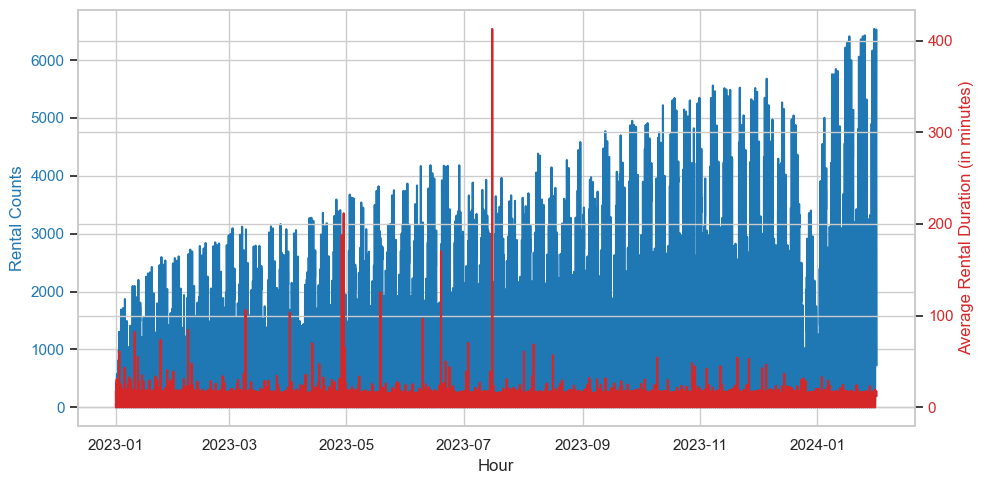

In [150]:
# visualize the data: rental counts and rental duration over entire timeframe

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(hourly_weather_rentals_filtered.index, hourly_weather_rentals_filtered['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(hourly_weather_rentals_filtered.index, hourly_weather_rentals_filtered['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

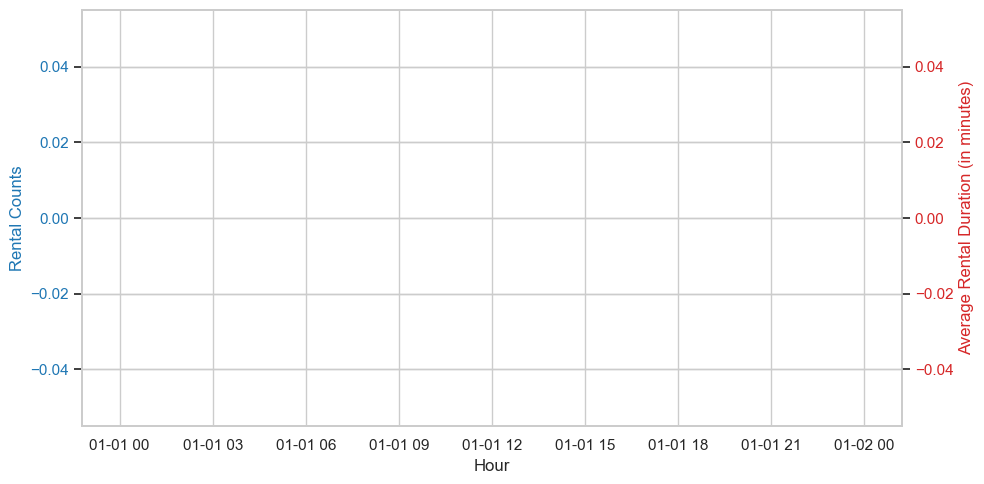

In [152]:
# visualize the data: rental counts and rental duration over one business day in 2021
# Feb 11 2021 = Thursday

# Filter the data for the specified date range
random_day = hourly_weather_rentals[(
    hourly_weather_rentals.index >= '2021-02-09 00:00:00') & (hourly_weather_rentals.index <= '2021-02-09 23:00:00'
                                                               )]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(random_day.index, random_day['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(random_day.index, random_day['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

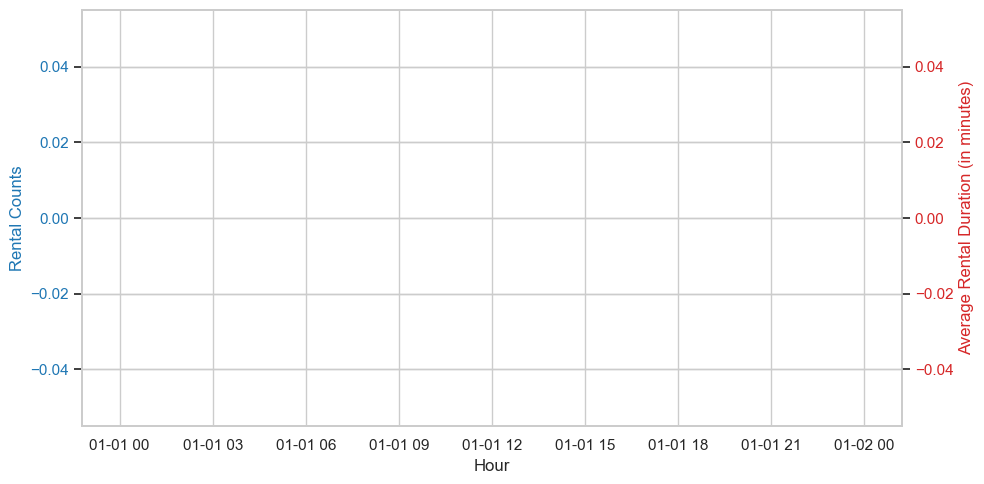

In [153]:
# visualize the data: rental counts and rental duration over one business day for one station in 2021
# Feb 09 2021 = Tuesday
# station 27 third highest pickup counts

# Filter the data for the specified date range
random_day = stations_weather_rentals[27][(
    stations_weather_rentals[27].index >= '2021-02-09 05:00:00') & (stations_weather_rentals[27].index <= '2021-02-10 00:00:00'
                                                               )]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(random_day.index, random_day['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(random_day.index, random_day['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<b>Observation:</b> Station 182 seems to follow a more "normal" work day seasonality than Station 27. Station 182 may be closer to offices/businesses.

## SARIMAX
<b>Hyperparametres</b><br>

First three from ARIMA:<br>
- <b>p</b>: Order of the AR term – relationship between an observation and a number of lagged observations (auto-regression); captures the effect of past values on current values
- <b>d</b>: Degree of differencing – differencing of raw observations to make the time series stationary (i.e., removing trends or seasonality); represents the number of differences needed to make the series stationary.
- <b>q</b>: Order of the MA term – relationship between the residual error and the lagged observations; captures the dependency between an observation and a residual error from a moving average model.

Last four for SARIMAX, similar to ARIMA hyperparamatres but with seasonal component:<br>
- <b>P</b>: Order of the seasonal AR term.
- <b>D</b>: Degree of seasonal differencing.
- <b>Q</b>: Order of the seasonal MA term.
- <b>m</b>: Seasonal length of the time series (e.g., 12 for monthly data, 4 for quarterly data)

### Seasonal decomposition
Checking out the presence of a seasonal component for one station<br>
<br>
<i>Parameters:</i>
- <b>x</b>: The time series data to be decomposed.
- <b>model</b>: This specifies the type of seasonal decomposition model to be used. It can be either 'additive' or 'multiplicative'.
    - With the 'additive' model, the components are combined linearly, while with the 'multiplicative' model, the components are combined multiplicatively.
- <b>filt</b>: This is an array filtering the trend component. By default, an evenly sized window will be used.
- <b>period</b>: An integer representing the periodicity of the series, i.e. number of observations per cycle. For example, 24 for daily data with hourly observations or 12 for monthly data with yearly observations. This parameter influences the seasonal component of the decomposition.
- <b>two_sided</b>: If True, moving averages are calculated symmetrically. If False, moving averages will be calculated using past values only.

In [154]:
InteractiveShell.ast_node_interactivity = "last_expr"

In [155]:
rental_counts_st6 = pd.Series(stations_weather_rentals[6]['rental_counts'].values, index=stations_weather_rentals[182].index)

In [159]:
rental_counts_st6.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9504 entries, 2023-01-01 00:00:00 to 2024-01-31 23:00:00
Series name: None
Non-Null Count  Dtype  
--------------  -----  
9504 non-null   float64
dtypes: float64(1)
memory usage: 148.5 KB


In [157]:
rental_counts_st6.fillna(0,inplace=True)

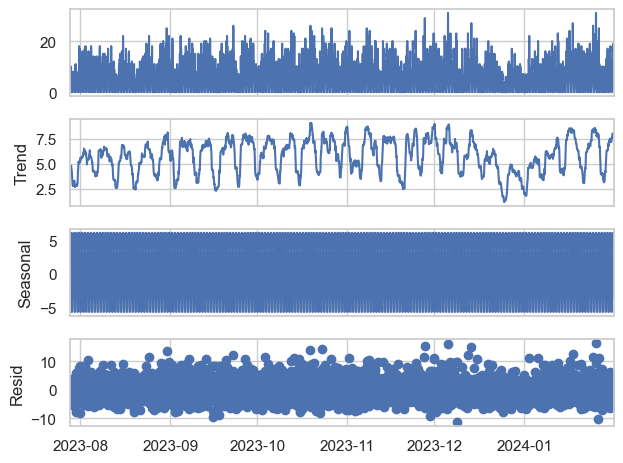

In [161]:
# decompose from observation #13000 onwards so that we can actually see the trends and seasonalities
decomposition = sm.tsa.seasonal_decompose(rental_counts_st6[5000:], 
                                          model='additive',  # no reason (yet) to believe magnitude of variation changes significantly with time
                                          period=24) # since we have hourly data

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
decomposition.plot()
plt.show()

# Trending upwards
# seasonality looks to be daily given the density of the plot
# resid is stable looking


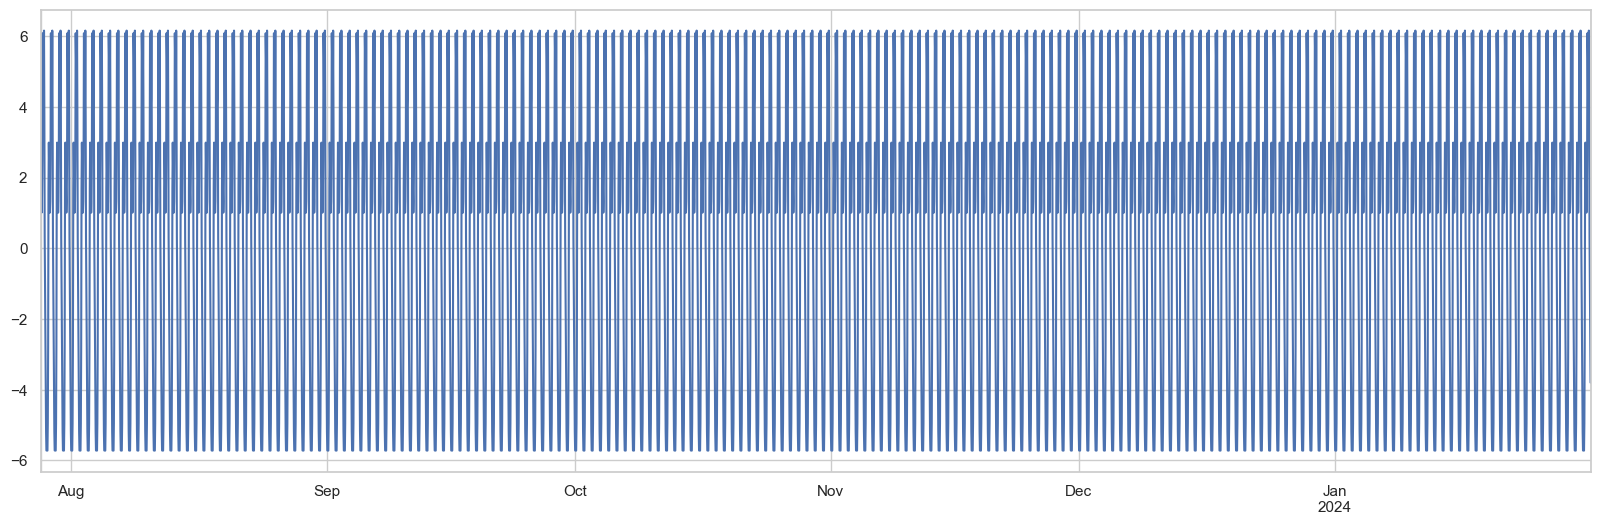

In [162]:
# closer examination at the seasonality, definitely looks daily
seasonal = decomposition.seasonal
plt.figure(figsize=(20, 6))
seasonal.plot()
plt.show()

### ACF and PACF
ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to diagnose patterns of autocorrelation in time series data, which can help in identifying the proper hyperparameters for models such as ARIMA and SARIMA, i.e. the order of AR, MA, and ARMA models.<br>
1. <b>Autocorrelation Function (ACF) Plot:</b>
    - The ACF plot shows the autocorrelation of the time series with its own lagged values. Each bar on the plot represents the correlation between the series and its lagged values at various lags.
    - Interpretation: In an ACF plot, significant autocorrelations that extend beyond the critical boundaries indicate the presence of autoregressive (AR) components in the data. For example, if the ACF values decay exponentially, it may indicate the series is stationary and lends itself to an ARIMA model.
<br><br>
2. <b>Partial Autocorrelation Function (PACF) Plot:</b>
    - The PACF plot displays the partial correlation of the time series with its own lagged values, while controlling for the values of the intervening lags.
    - Interpretation: In a PACF plot, significant partial autocorrelations that extend beyond the critical boundaries imply the presence of a moving average (MA) component in the data.

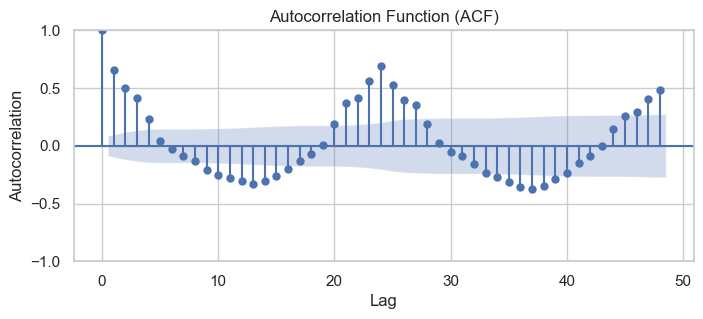

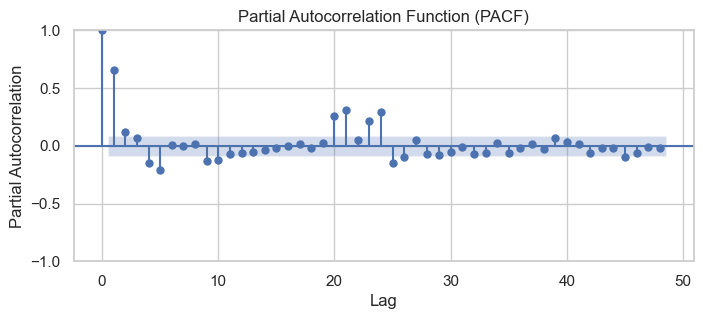

In [164]:
# check the ACF and PACF plots and confirm the presence of seasonality and the seasonal period
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(rental_counts_st6[9000:], ax=ax, lags=48)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(rental_counts_st6[9000:], ax=ax, lags=48)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### Splitting the data
starting with station 6

In [165]:
# split our timeseries dataset into train/test sets

def SARIMA_train_test_split(df, test_percentage): # df = dataframe, test_percentage = proportion of df we want to keep for testing
    n_test = int(round(len(df)*test_percentage, 0))
    train = df.iloc[:-n_test]
    test = df.iloc[-n_test:]
    return train, test

In [166]:
train, test = SARIMA_train_test_split(stations_weather_rentals[6].drop('avg_rental_duration',axis=1), 0.20)

In [167]:
test

,rental_counts,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2023-11-13 19:00:00,12.0,1,22.8,44,22.9,0.1,15,9.2,1
2023-11-13 20:00:00,7.0,1,23.7,40,23.4,0.0,7,8.5,1
2023-11-13 21:00:00,9.0,1,24.1,38,23.1,0.0,30,8.7,1
2023-11-13 22:00:00,7.0,1,23.1,40,20.6,0.0,24,15.1,1
2023-11-13 23:00:00,1.0,1,22.2,42,19.8,0.0,32,14.2,1
...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,12.0,1,18.8,26,15.5,0.0,75,6.6,1
2024-01-31 20:00:00,7.0,1,20.8,20,17.2,0.0,85,7.5,1
2024-01-31 21:00:00,7.0,1,21.7,20,18.4,0.0,79,6.9,1
2024-01-31 22:00:00,9.0,1,21.7,20,18.3,0.0,85,6.8,1


### Grid search for best hyperparameters

In [168]:
import itertools
import math
import warnings
warnings.filterwarnings('ignore')

In [170]:
# with default solver: L-BFGS-B

# # Define the range of values for p, d, q, P, D, Q, and m
# p_values = range(0, 3)  # Autoregressive order
# d_values = [0]          # Differencing order
# q_values = range(0, 3)  # Moving average order
# P_values = range(0, 2)  # Seasonal autoregressive order
# D_values = range(0, 1)  # Seasonal differencing order
# Q_values = range(0, 2)  # Seasonal moving average order
# m_values = [24]         # Seasonal period

# # Create all possible combinations of SARIMA parameters
# param_combinations = list(itertools.product(p_values, 
#                                             d_values, 
#                                             q_values, 
#                                             P_values, 
#                                             D_values, 
#                                             Q_values, 
#                                             m_values))

# # Initialize AIC with a large value (positive infinity = "inf")
# best_aic = float("inf")  
# best_params = None

# # Perform grid search
# for params in param_combinations:
#     order = params[:3]
#     seasonal_order = params[3:]
    
#     try:
#         model = sm.tsa.SARIMAX(endog=train['rental_counts'], 
#                                exog=train.drop('rental_counts',axis=1), 
#                                order=order, 
#                                seasonal_order=seasonal_order)
#         result = model.fit(disp=False)
#         aic = result.aic
        
#         # Ensure the convergence of the model
#         if not math.isinf(result.zvalues.mean()):
#             print(order, seasonal_order, aic)
        
#             if aic < best_aic:
#                 best_aic = aic
#                 best_params = params
                
#         else:
#             print(order, seasonal_order, 'not converged')

#     except:
#         continue

# # Print the best parameters and AIC
# print("Best Parameters:", best_params)
# print("Best AIC:", best_aic)


(0, 0, 0) (0, 0, 0, 24) 42834.37439337958
(0, 0, 0) (0, 0, 1, 24) 41464.77510146398
(0, 0, 0) (1, 0, 0, 24) 40610.50015737368
(0, 0, 0) (1, 0, 1, 24) 38522.05993450863
(0, 0, 1) (0, 0, 0, 24) 41644.7125061501
(0, 0, 1) (0, 0, 1, 24) 40783.16641471046
(0, 0, 1) (1, 0, 0, 24) 40266.39987611248
(0, 0, 1) (1, 0, 1, 24) 38364.41730016533
(0, 0, 2) (0, 0, 0, 24) 41243.58305607521
(0, 0, 2) (0, 0, 1, 24) 40526.29770119384
(0, 0, 2) (1, 0, 0, 24) 40114.69829019638
(0, 0, 2) (1, 0, 1, 24) 38258.45162773178
(1, 0, 0) (0, 0, 0, 24) 41118.457614293264
(1, 0, 0) (0, 0, 1, 24) 40494.49093462834
(1, 0, 0) (1, 0, 0, 24) 40140.20031139121
(1, 0, 0) (1, 0, 1, 24) 38380.96991322709
(1, 0, 1) (0, 0, 0, 24) 41000.233008824594
(1, 0, 1) (0, 0, 1, 24) 40347.31632444963
(1, 0, 1) (1, 0, 0, 24) 40030.49941219076
(1, 0, 1) (1, 0, 1, 24) 38276.26497447549
(1, 0, 2) (0, 0, 0, 24) 41008.33240706242
(1, 0, 2) (0, 0, 1, 24) 40351.249057318026
(1, 0, 2) (1, 0, 0, 24) 40026.54909466358
(1, 0, 2) (1, 0, 1, 24) 38372.10

In [177]:
# with method = 'nm'

# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [24]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value (positive infinity = "inf")
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    try:
        model = sm.tsa.SARIMAX(endog=train['rental_counts'], 
                               exog=train.drop('rental_counts',axis=1), 
                               order=order, 
                               seasonal_order=seasonal_order)
        result = model.fit(disp=False, method='nm')
        aic = result.aic
        
        # Ensure the convergence of the model
        if not math.isinf(result.zvalues.mean()):
            print(order, seasonal_order, aic)
        
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        else:
            print(order, seasonal_order, 'not converged')

    except:
        continue

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)


(0, 0, 0) (0, 0, 0, 24) 42920.81264029126
(0, 0, 0) (0, 0, 1, 24) 41476.291997915556
(0, 0, 0) (1, 0, 0, 24) 40781.714376413045
(0, 0, 0) (1, 0, 1, 24) 39849.10740178736
(0, 0, 1) (0, 0, 0, 24) 41679.64331873461
(0, 0, 1) (0, 0, 1, 24) 40951.654422251915
(0, 0, 1) (1, 0, 0, 24) 40693.760327228156
(0, 0, 1) (1, 0, 1, 24) 39943.41400200725
(0, 0, 2) (0, 0, 0, 24) 41291.51814676923
(0, 0, 2) (0, 0, 1, 24) 40688.822981354766
(0, 0, 2) (1, 0, 0, 24) 40575.9527607223
(0, 0, 2) (1, 0, 1, 24) 39926.4768631605
(1, 0, 0) (0, 0, 0, 24) 41175.89075148119
(1, 0, 0) (0, 0, 1, 24) 40628.99471602173
(1, 0, 0) (1, 0, 0, 24) 40472.12872324507
(1, 0, 0) (1, 0, 1, 24) 39845.29647331202
(1, 0, 1) (0, 0, 0, 24) 41110.0598364311
(1, 0, 1) (0, 0, 1, 24) 40475.21889337545
(1, 0, 1) (1, 0, 0, 24) 40346.52498906056
(1, 0, 1) (1, 0, 1, 24) 39717.55833128184
(1, 0, 2) (0, 0, 0, 24) 41105.18736142483
(1, 0, 2) (0, 0, 1, 24) 40570.15049867827
(1, 0, 2) (1, 0, 0, 24) 40404.8993133921
(1, 0, 2) (1, 0, 1, 24) 39790.094

### Fitting SARIMAX + Predictions

In [178]:
# Assuming 'endog' contains the time series variable and 'exog' contains the exogenous variables
# Assuming 'y' is the rental_counts variable
# change the solver when fitting, L-BFGS-B is better for small datasets
    ## NOTE: Need to re-run the grid search to fit with method='nm'

# Fit the SARIMAX model
model = sm.tsa.SARIMAX(train['rental_counts'], \
                       exog=train.drop('rental_counts',axis=1), order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
results = model.fit(method='nm')

### Assessing our SARIMAX model

In our summary, the <b>“P>|z|”</b> provides the p-value associated with each coefficient. For the coefficient to be significant, they should be lower than our significance level of 0.05.<br>
<br>
Examining our model's <b>plot diagnostics</b>, we want to see:
1. The standardized residual shouldn’t have any obvious patterns, i.e. random noise, data with a zero mean and a uniform variance. The residuals should be uncorrelated with Gaussian noise centered on zero.
2. The histogram plus KDE estimate should look similar to a normal distribution
3. In the Normal Q-Q graph, we should observe the majority of the points lying on the straight line, indicating a normal distribution of the residuals.
    - <i>(quantile-quantile graph: graphical comparison between the empirical quantiles of the data and the quantiles of the theoretical distribution)</i>
4. In the ACF or correlogram, 95% of correlations for lag greater than one should be within the confidence band, i.e. not significant.

In [179]:
results.summary()

# The “P>|z|” column provides the p-value associated with each coefficient, 
# for all cases they are lower than 0.05, our significance level, 
# which means that all of them are statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      rental_counts   No. Observations:                 7603
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -19845.779
Date:                            Mon, 04 Mar 2024   AIC                          39717.558
Time:                                    14:22:03   BIC                          39807.730
Sample:                                01-01-2023   HQIC                         39748.501
                                     - 11-13-2023                                         
Covariance Type:                              opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_business_day       2.4904      0.148     16.833      0.000       2.200       2.780
temperature_C        -0.1322      0.074     -1.786      0.074      -0.277       0.013
rel_humidity_perc     0.0522      0.003     16.920      0.000       0.046       0.058
feels_like_temp_C     0.1407      0.071      1.975      0.048       0.001       0.280
rain_mm              -0.9166      0.057    -16.011      0.000      -1.029      -0.804
cloud_cover_perc     -0.0127      0.002     -6.382      0.000      -0.017      -0.009
wind_speed_kmh       -0.1454      0.017     -8.744      0.000      -0.178      -0.113
is_day                3.5870      0.268     13.360      0.000       3.061       4.113
ar.L1                 0.5726      0.029     19.936      0.000       0.516       0.629
ma.L1                -0.2741      0.032     -8.647      0.000      -0.336      -0.212
ar.S.L24              0.8006      0.016     51.150      0.000       0.770       0.831
ma.S.L24             -0.6011      0.022    -27.463      0.000      -0.644      -0.558
sigma2               11.1444      0.167     66.674      0.000      10.817      11.472
===================================================================================
Ljung-Box (L1) (Q):                  13.01   Jarque-Bera (JB):              1799.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

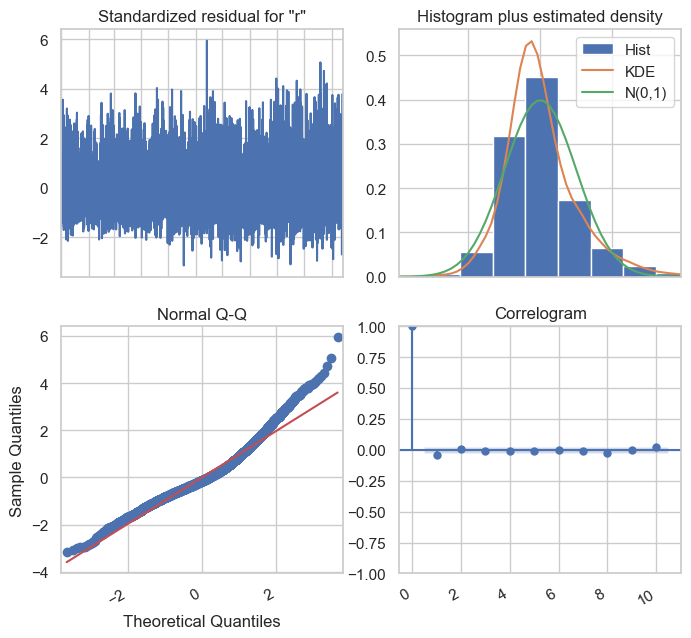

In [180]:
fig = results.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

# 1. standardized residual looks heavier for the first half
# 2. histogram and KDE are somewhat normally distributed
# 3. In the Normal Q-Q graph, points don't completely lie on the straight line
# 4. 1st and last lags not within confidence band

In [182]:
# get predictions for test set
# set prediction period 
start_datetime = pd.Timestamp('2023-11-13 19:00:00')
end_datetime = pd.Timestamp('2024-01-31 23:00:00')

# Make predictions
predictions = results.predict(start=start_datetime, end=end_datetime, exog=test.drop('rental_counts',axis=1))

2023-11-13 19:00:00    10.569594
2023-11-13 20:00:00     8.640048
2023-11-13 21:00:00     6.585180
2023-11-13 22:00:00     5.072239
2023-11-13 23:00:00     5.174447
                         ...    
2024-01-31 19:00:00     5.213845
2024-01-31 20:00:00     4.617198
2024-01-31 21:00:00     4.830684
2024-01-31 22:00:00     4.754700
2024-01-31 23:00:00     5.155093
Freq: H, Name: predicted_mean, Length: 1901, dtype: float64

In [194]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [192]:
# calculate residuals of our test data and predictions
test_residuals = pd.DataFrame({'rental_counts': test['rental_counts'], 'predictions': predictions}, index=predictions.index)
test_residuals['residuals'] = test_residuals['rental_counts']-test_residuals['predictions']
test_residuals

,rental_counts,predictions,residuals
2023-11-13 19:00:00,12.0,10.569594,1.430406
2023-11-13 20:00:00,7.0,8.640048,-1.640048
2023-11-13 21:00:00,9.0,6.585180,2.414820
2023-11-13 22:00:00,7.0,5.072239,1.927761
2023-11-13 23:00:00,1.0,5.174447,-4.174447
...,...,...,...
2024-01-31 19:00:00,12.0,5.213845,6.786155
2024-01-31 20:00:00,7.0,4.617198,2.382802
2024-01-31 21:00:00,7.0,4.830684,2.169316
2024-01-31 22:00:00,9.0,4.754700,4.245300


In [195]:
# calculating error metrics for test data

me_test = round(test_residuals.residuals.mean(),2)
print(f'mean error of test: {me_test}')

mse_test = round(mse(test['rental_counts'],predictions),2) # mean squared error
print(f'mean squared error of test: {mse_test}')

mae_test = round(mae(test['rental_counts'],predictions),2) # mean absolute error
print(f'mean absolut error of test: {mae_test}')

rmse_test = round(mse(test['rental_counts'],predictions,squared=False),2) # root mean squared error
print(f'root mean squared error of test: {rmse_test}')

mean error of test: 0.92
mean squared error of test: 20.66
mean absolut error of test: 3.46
root mean squared error of test: 4.55


<b>mean error:</b> on average, the model tends to overestimate the target values by 0.92 units<br>
<b>mean squared error:</b> A mean squared error of 20.66 indicates the average squared magnitude of the prediction errors. It provides a sense of the overall variability or dispersion of the errors.<br>
<b>mean absolute error:</b> A mean absolute error of 3.46 signifies the average magnitude of the errors without considering their direction.<br>
<b>root mean squared error:</b> An RMSE of 4.55 suggests the typical size of the errors (standard deviations) generated by the model.<br>

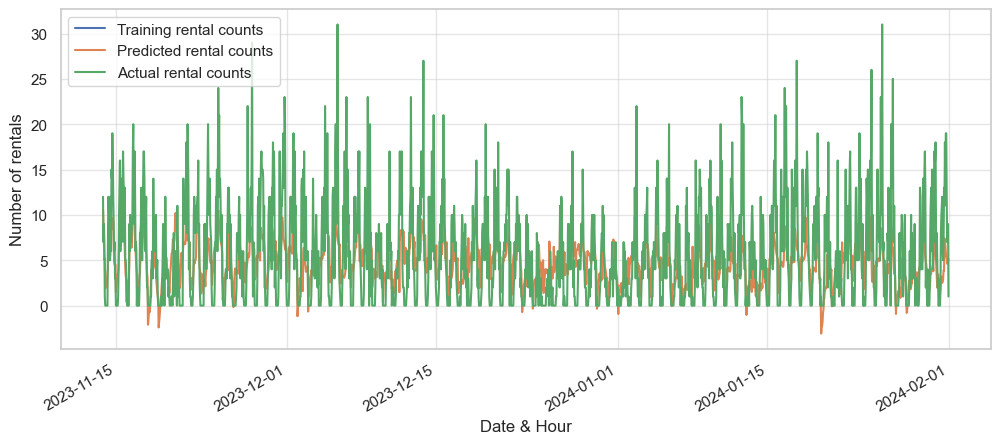

In [184]:
# Plot test predictions with training data

ax = train['rental_counts'][8000:].plot(figsize=(12,5))
predictions.plot()
test['rental_counts'].plot(ax=ax)
# plt.fill_between(predictions.index, 
#                  confidence_intervals['lower tmax'], 
#                  confidence_intervals['upper tmax'], 
#                  color='blue',
#                  alpha=0.15)
plt.legend(['Training rental counts', 
            'Predicted rental counts', 
            'Actual rental counts'], 
           loc='upper left')
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

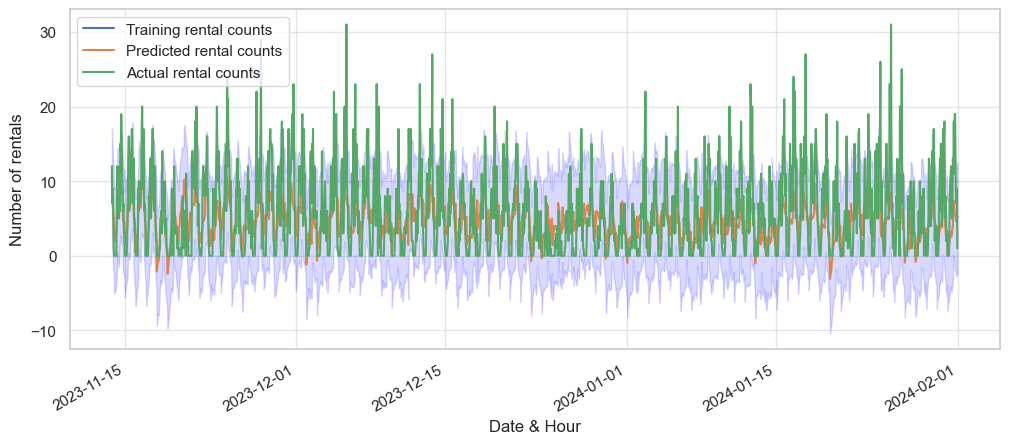

In [187]:
# Plot test forecast with training data (same as above but diff function, with confidence intervals)

forecast = results.get_forecast(steps=1901, exog=test.drop('rental_counts',axis=1)) # steps = number of rows in test set
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

ax = train['rental_counts'][8000:].plot(figsize=(12,5))
forecast_values.plot()
test['rental_counts'].plot(ax=ax)
plt.fill_between(predictions.index, 
                 confidence_intervals['lower rental_counts'], 
                 confidence_intervals['upper rental_counts'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training rental counts', 
            'Predicted rental counts', 
            'Actual rental counts'], 
           loc='upper left')
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

In [89]:
# Get forecast and confidence intervals for next two days
# NEED exogenous variables for the next 48 hours, i.e. weather data, is_business_day, etc.

forecast = results.get_forecast(steps=48, exog=test.drop('rental_counts',axis=1)) # 48 hours for next two days
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast with training data
ax = test['rental_counts'].plot(figsize=(10,5))
forecast_values.plot()
test['rental_counts'].plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower tmax'], 
                 confidence_intervals['upper tmax'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training rental counts', 
            'Predicted rental counts', 
            'Actual rental counts'], 
           loc='upper left')
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

### User input – search forecast by day and time

In [228]:
user_input_datetime = input("Retrieve forecast for desired date and hour [yyyy-mm-dd hh]\n"
                            "Leave day and/or hour blank if you want to retrieve a range: \n").strip()

Retrieve forecast for desired date and hour [yyyy-mm-dd hh]
Leave day and/or hour blank if you want to retrieve a range: 
2024-01


'2024-01'

In [229]:
return_forecast = full_forecast_df[full_forecast_df.index.astype(str).str.contains(user_input_datetime)]
return_forecast

,rental_counts,predictions,residuals
2024-01-01 00:00:00,2.0,2.245516,-0.245516
2024-01-01 01:00:00,0.0,-0.930810,0.930810
2024-01-01 02:00:00,0.0,1.701539,-1.701539
2024-01-01 03:00:00,0.0,0.349492,-0.349492
2024-01-01 04:00:00,0.0,1.417609,-1.417609
...,...,...,...
2024-01-31 19:00:00,12.0,5.213845,6.786155
2024-01-31 20:00:00,7.0,4.617198,2.382802
2024-01-31 21:00:00,7.0,4.830684,2.169316
2024-01-31 22:00:00,9.0,4.754700,4.245300


In [235]:
def retrieve_forecast(search_datetime):
    return_forecast = full_forecast_df[full_forecast_df.index.astype(str).str.contains(search_datetime)]
    return return_forecast

In [237]:
search_datetime = input("Retrieve forecast for desired date and hour [yyyy-mm-dd hh]\n"
                        "Search for a full year, a full month, or a full day by leaving out the succeeding values.\n"
                        "e.g. 2024-01-02 full a full day, or 2024-01 for a full month.\n").strip()

retrieve_forecast(search_datetime)

Retrieve forecast for desired date and hour [yyyy-mm-dd hh]
Search for a full year, a full month, or a full day by leaving out the succeeding values.
e.g. 2024-01-02 full a full day, or 2024-01 for a full month.
2024-01


,rental_counts,predictions,residuals
2024-01-01 00:00:00,2.0,2.245516,-0.245516
2024-01-01 01:00:00,0.0,-0.930810,0.930810
2024-01-01 02:00:00,0.0,1.701539,-1.701539
2024-01-01 03:00:00,0.0,0.349492,-0.349492
2024-01-01 04:00:00,0.0,1.417609,-1.417609
...,...,...,...
2024-01-31 19:00:00,12.0,5.213845,6.786155
2024-01-31 20:00:00,7.0,4.617198,2.382802
2024-01-31 21:00:00,7.0,4.830684,2.169316
2024-01-31 22:00:00,9.0,4.754700,4.245300
